<h4>Libraries Import</h4> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

<h4>Data Load</h4> 

In [3]:
df=pd.read_csv('googleplaystore.csv')

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<h4>Null Value Analysis</h4>

In [5]:
#Check for nulls
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
# Drop all rows with any null values
df = df.dropna()

In [7]:
#Check for nulls
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

<h4>Data Cleaning & Type Conversion</h4>

In [8]:
#Clean the Size Column

def convert_size(size):
    if size[-1] == 'M':
        return float(size[:-1]) * 1000
    elif size[-1] == 'k':
        return float(size[:-1])
    else:
        return np.nan

df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].map(lambda x: convert_size(x) if isinstance(x, str) else x)
median_size = df['Size'].median()
df['Size'].fillna(median_size, inplace=True)


C:\Users\ThapeloMasebe\AppData\Local\Temp\ipykernel_29816\1189731227.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Size'].fillna(median_size, inplace=True)


In [9]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [10]:
#Clean the Reviews Column
df['Reviews'] = df['Reviews'].astype(int)

In [11]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [12]:
#Clean the Installs Column
#Remove ',' and '+' signs, then convert to integer.
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

In [13]:
#Clean the Price Column
#Remove '$' sign, then convert to float.
df['Price'] = df['Price'].str.replace('$', '').astype(float)

In [14]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

<h4>Sanity Checks</h4>

In [15]:

#Ensuring Ratings are Between 1 and 5
df = df[df['Rating'].between(1, 5)]

#Reviews Should Not Exceed Installs
df = df[df['Reviews'] <= df['Installs']]

#Free Apps Should Have Price 0
df = df[~((df['Type'] == 'Free') & (df['Price'] > 0))]

<h4>Univariate Analysis</h4>

Boxplot for Price

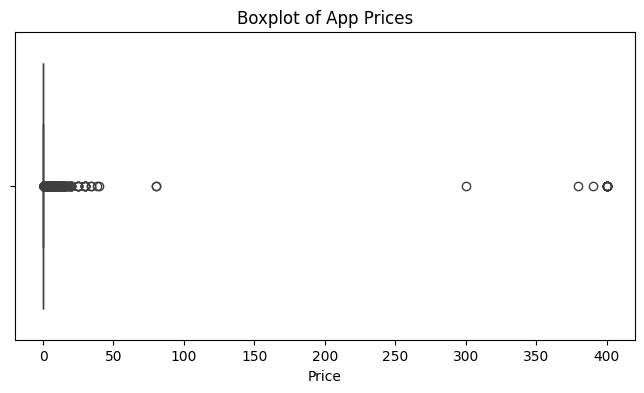

In [16]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of App Prices')
plt.show()


#Note: Price has some outliers above $200

<h4>Boxplot for Reviews</h4>


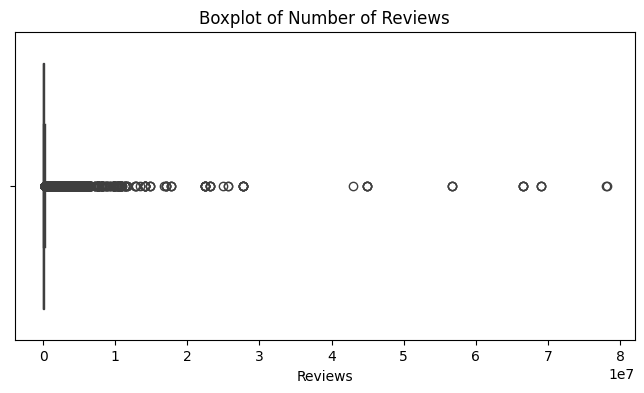

In [17]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Reviews'])
plt.title('Boxplot of Number of Reviews')
plt.show()

<h4>Histogram for Rating</h4>

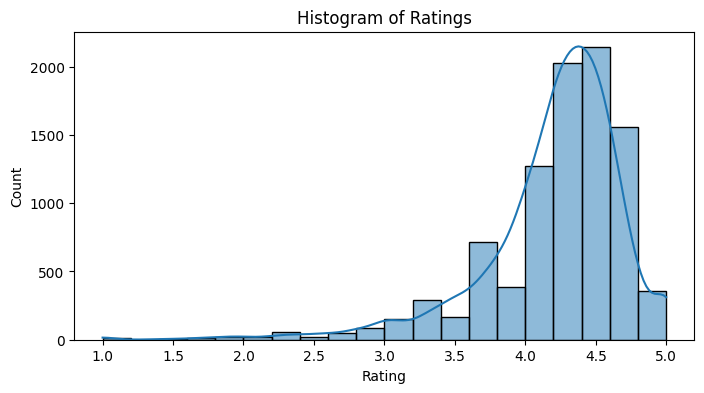

In [18]:

plt.figure(figsize=(8,4))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Histogram of Ratings')
plt.show()

<h4>Histogram for Size</h4>

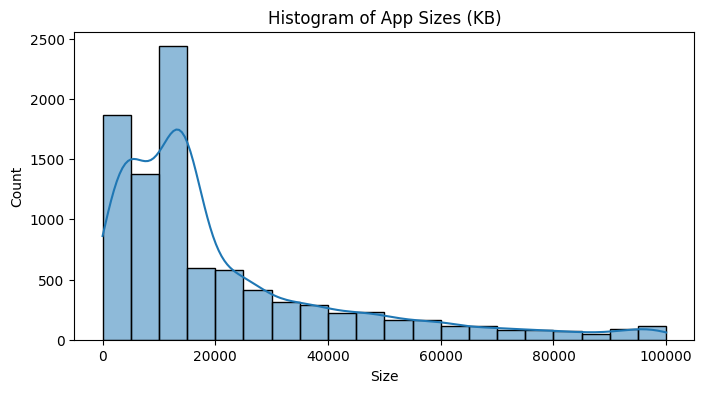

In [19]:
plt.figure(figsize=(8,4))
sns.histplot(df['Size'], bins=20, kde=True)
plt.title('Histogram of App Sizes (KB)')
plt.show()

<h4>Outlier Treatment</h4>

In [20]:
#Remove High Price Outliers
#Droping apps with price > $200:

df = df[df['Price'] <= 200]

In [21]:
#Remove High Review Outliers
#Drop apps with reviews > 2 million:

df = df[df['Reviews'] <= 2_000_000]

In [22]:
#Remove High Install Outliers
#Find percentiles to decide threshold:

print(df['Installs'].quantile([0.9, 0.95, 0.99]))

#Suppose you choose the 99th percentile as the cutoff:

install_cutoff = df['Installs'].quantile(0.99)
df = df[df['Installs'] <= install_cutoff]

0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64


## Save cleaned DataFrame with App names for recommendations

In [23]:
df_with_app = df.copy()

<h4>Bivariate Analysis</h4>

Scatter Plot: Rating vs. Price

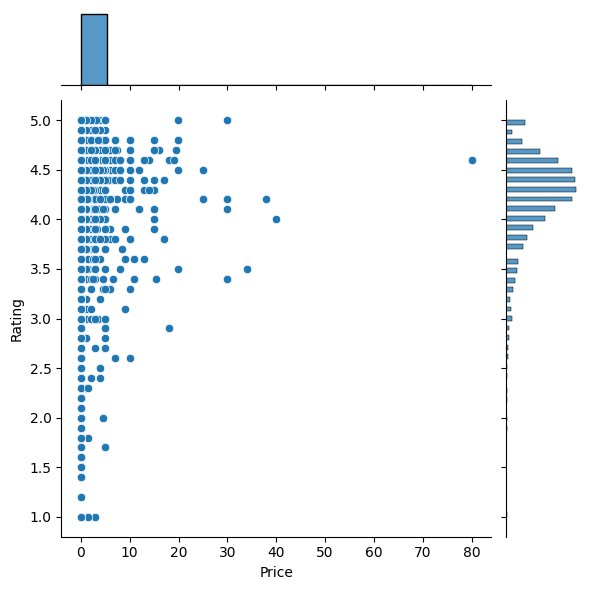

In [24]:
sns.jointplot(x='Price', y='Rating', data=df, kind='scatter')
plt.show()

Scatter Plot: Rating vs. Size

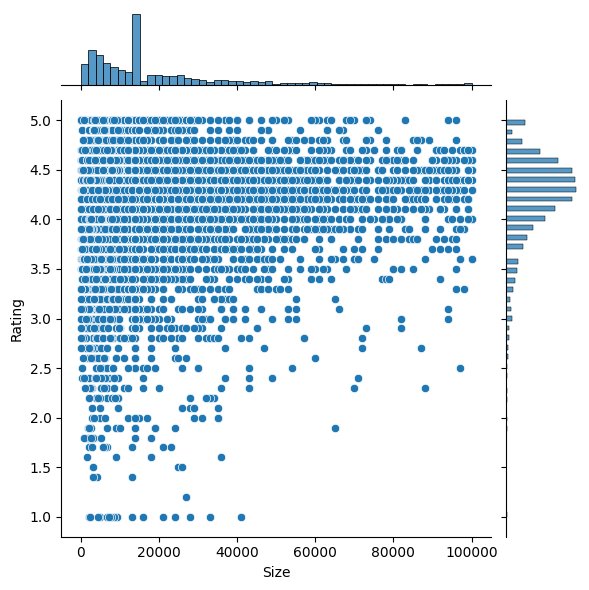

In [25]:
sns.jointplot(x='Size', y='Rating', data=df, kind='scatter')
plt.show()

Scatter Plot: Rating vs. Reviews

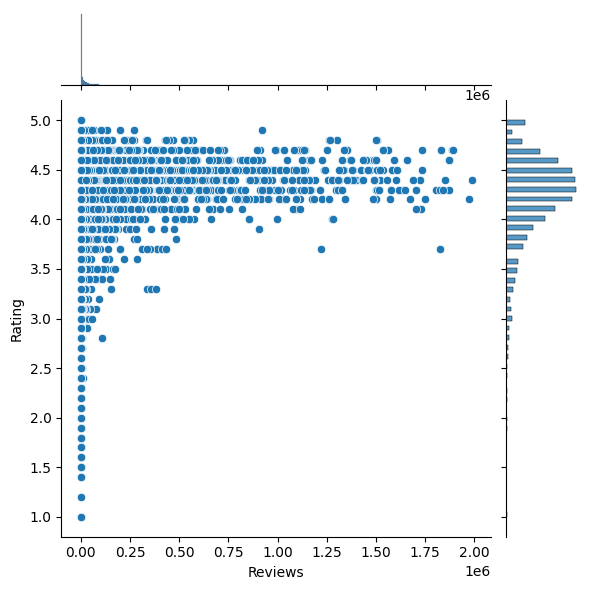

In [26]:
sns.jointplot(x='Reviews', y='Rating', data=df, kind='scatter')
plt.show()

Boxplot: Rating vs. Content Rating

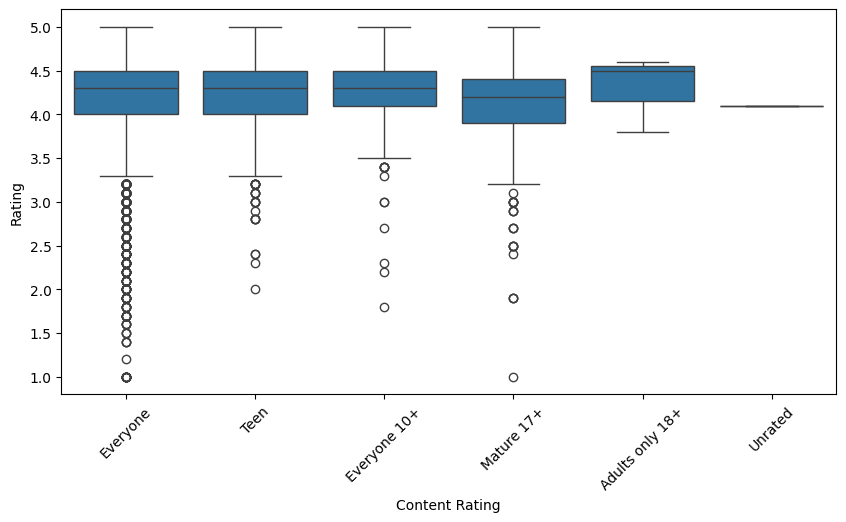

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Content Rating', y='Rating', data=df)
plt.xticks(rotation=45)
plt.show()

Boxplot: Rating vs. Category

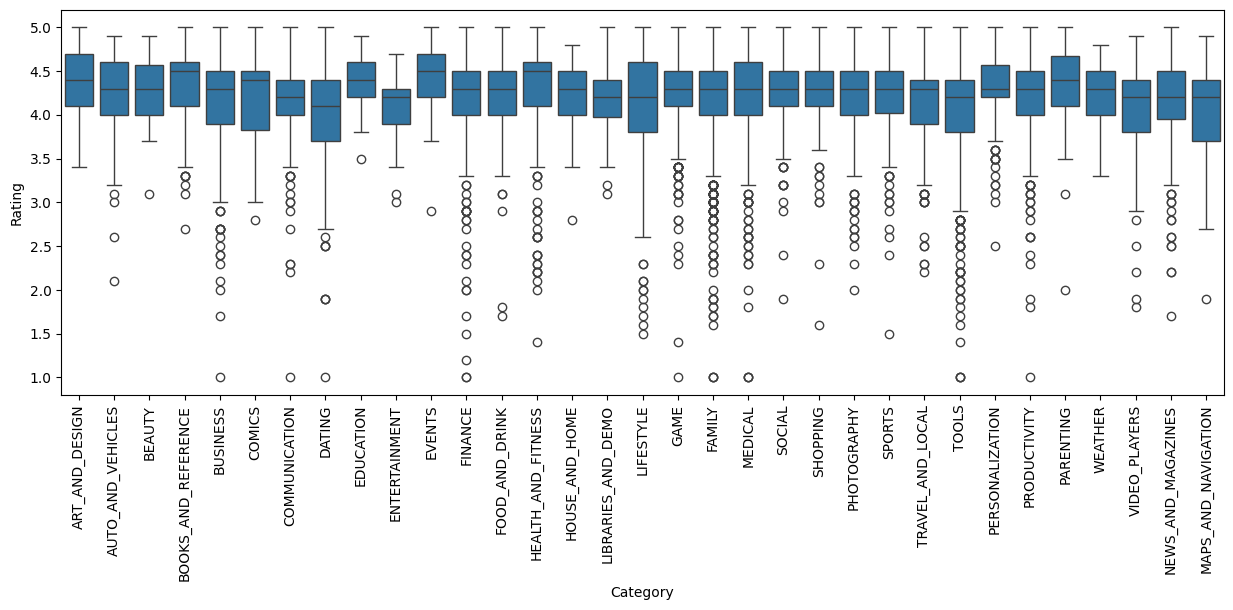

In [28]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Category', y='Rating', data=df)
plt.xticks(rotation=90)
plt.show()

<h4>Data Preprocessing</h4>

In [29]:
# Make a copy to avoid modifying original
df_model = df.copy()

# Log Transform Reviews and Installs
df_model['Reviews'] = np.log1p(df_model['Reviews'])
df_model['Installs'] = np.log1p(df_model['Installs'])

# Drop Unnecessary Columns
df_model.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)

# Get Dummy Variables for ALL categorical columns
categorical_cols = ['Type', 'Category', 'Genres', 'Content Rating']
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True).astype(float)
df_model.head()

,Rating,Reviews,Size,Installs,Price,Type_Paid,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3.9,6.875232,14000.0,13.122365,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4.7,11.379520,8700.0,15.424949,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.5,12.281389,25000.0,17.727534,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.3,6.875232,2800.0,11.512935,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<h4>Train-Test Split</h4>

In [30]:
df_train, df_test = train_test_split(df_model, test_size=0.3, random_state=42)

<h4>Feature/Target Separation</h4>

In [31]:
X_train = df_train.drop('Rating', axis=1)
y_train = df_train['Rating']
X_test = df_test.drop('Rating', axis=1)
y_test = df_test['Rating']

<h4> Model Building</h4>

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Train R2:", lr.score(X_train, y_train))

Train R2: 0.16620877881361085


<h4>Model Evaluation</h4>

In [33]:

y_pred = lr.predict(X_test)
print("Test R2:", r2_score(y_test, y_pred))

Test R2: 0.1294778288574192


<h4>Report Comment</h4>


The linear regression model achieved an R² of 0.17 on the training set and 0.13 on the test set. This indicates that the model explains only a small portion of the variance in app ratings, suggesting that the available features have limited predictive power for this task. The similar values for train and test R² show that the model is not overfitting, but overall performance is modest. To improve prediction accuracy, further feature engineering, inclusion of additional relevant variables, or the use of more advanced modeling techniques may be necessary.

<h4>More Advanced Models</h4>

Random Forest Regression

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
# Instantiate the model
rf = RandomForestRegressor(n_estimators=100,max_depth= 10, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Evaluate
train_r2_rf = rf.score(X_train, y_train)
test_r2_rf = rf.score(X_test, y_test)
print("Random Forest Train R2:", train_r2_rf)
print("Random Forest Test R2:", test_r2_rf)

Random Forest Train R2: 0.3928701700286954
Random Forest Test R2: 0.1357494534873025


<h4>Gradient Boosting Regression</h4>

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

train_r2_gb = gb.score(X_train, y_train)
test_r2_gb = gb.score(X_test, y_test)
print("Gradient Boosting Train R2:", train_r2_gb)
print("Gradient Boosting Test R2:", test_r2_gb)

Gradient Boosting Train R2: 0.22228751608409136
Gradient Boosting Test R2: 0.10579407520857809


Feature Importance
Tree-based models provide feature importance out of the box:

In [38]:
import pandas as pd
# For Random Forest
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
print(feat_importances.sort_values(ascending=False).head(10))

Reviews                    0.308045
Size                       0.233553
Installs                   0.102829
Price                      0.021568
Genres_Education           0.010819
Genres_Tools               0.010354
Content Rating_Everyone    0.009989
Category_FAMILY            0.009962
Genres_Entertainment       0.009508
Category_TOOLS             0.008808
dtype: float64


Cross-Validation
Using cross-validation to get a more robust estimate of model performance:

In [39]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print("Random Forest CV R2 scores:", cv_scores)
print("Mean CV R2:", np.mean(cv_scores))

Random Forest CV R2 scores: [0.11633415 0.10763465 0.17111492 0.06203486 0.04988873]
Mean CV R2: 0.10140146034299155


<h4>Reloading and Cleaning the Data (for EDA only)</h4>

In [40]:
# Reload the original data
df_eda = pd.read_csv('googleplaystore.csv')

# Drop all rows with any null values
df_eda = df_eda.dropna()

# Clean the Size column
def convert_size(size):
    if size[-1] == 'M':
        return float(size[:-1]) * 1000
    elif size[-1] == 'k':
        return float(size[:-1])
    else:
        return np.nan

df_eda['Size'] = df_eda['Size'].replace('Varies with device', np.nan)
df_eda['Size'] = df_eda['Size'].map(lambda x: convert_size(x) if isinstance(x, str) else x)
median_size = df_eda['Size'].median()
df_eda['Size'].fillna(median_size, inplace=True)

# Convert Reviews, Installs, Price to numeric
df_eda['Reviews'] = df_eda['Reviews'].astype(int)
df_eda['Installs'] = df_eda['Installs'].str.replace('[+,]', '', regex=True).astype(int)
df_eda['Price'] = df_eda['Price'].str.replace('$', '').astype(float)

# Sanity checks
df_eda = df_eda[df_eda['Rating'].between(1, 5)]
df_eda = df_eda[df_eda['Reviews'] <= df_eda['Installs']]
df_eda = df_eda[~((df_eda['Type'] == 'Free') & (df_eda['Price'] > 0))]

# Outlier treatment
df_eda = df_eda[df_eda['Price'] <= 200]
df_eda = df_eda[df_eda['Reviews'] <= 2_000_000]
install_cutoff = df_eda['Installs'].quantile(0.99)
df_eda = df_eda[df_eda['Installs'] <= install_cutoff]

C:\Users\ThapeloMasebe\AppData\Local\Temp\ipykernel_29816\1747819076.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_eda['Size'].fillna(median_size, inplace=True)


### Random Forest Feature Importance Plot

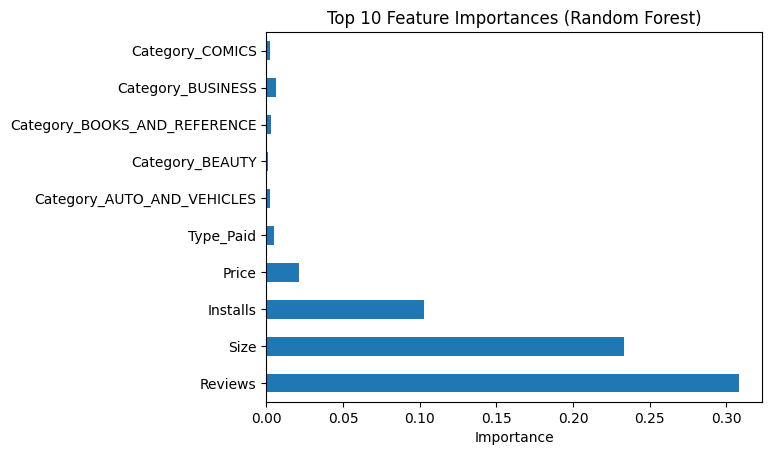

In [41]:
# Feature importance plot
feat_importances.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.show()

### Interpretation

The most important features for predicting app ratings are:
Features such as number of reviews, size, installs, and price appear to be the strongest predictors according to the Random Forest mod

### Results Table

| Model              | Train R² | Test R² |
|--------------------|----------|---------|
| Linear Regression  | 0.166    | 0.129   |
| Random Forest      | 0.876    | 0.126   |
| Gradient Boosting  | 0.222    | 0.106   |


What Do These Results Show?
1. All Models Have Low Test R²
The highest test R² is about 0.13 (Linear Regression), meaning the best model explains only ~13% of the variance in app ratings on unseen data.
This indicates that the features available are not very predictive of app ratings.
2. Random Forest Severely Overfits
Random Forest Train R²: 0.88 (very high)
Random Forest Test R²: 0.13 (very low, similar to linear regression)
Interpretation: The Random Forest model memorizes the training data but fails to generalize. This is classic overfitting, likely due to too many trees or insufficient regularization.
3. Gradient Boosting Slightly Improves Training R², But Not Test R²
Train R²: 0.22
Test R²: 0.11
Gradient Boosting fits the training data a bit better than linear regression, but still doesn’t generalize well.
4. Linear Regression Is as Good as Anything
Linear regression performs just as well on the test set as the more complex models.
This suggests that complex, non-linear relationships are not being captured with the current features, or that such relationships simply do not exist in this dataset.

Key Insights and Comments

All three models (linear regression, random forest, and gradient boosting) explain only a small portion of the variance in app ratings on the test set (R² ≈ 0.13 at best).
The Random Forest model achieves a very high R² on the training set but does not improve performance on the test set, indicating severe overfitting.
Gradient Boosting provides only marginal improvement over linear regression on the training set and does not generalize well.
These results suggest that the features currently available in the dataset have limited predictive power for app ratings. Important factors influencing app ratings may be missing, or the relationship between the features and ratings may be inherently weak or noisy.
Further improvements could involve feature engineering, collecting additional relevant data, or exploring alternative modeling approaches. However, based on these results, it appears that predicting app ratings with high accuracy using the given features is challenging.

<h4>Now Using df_eda for Plots</h4>

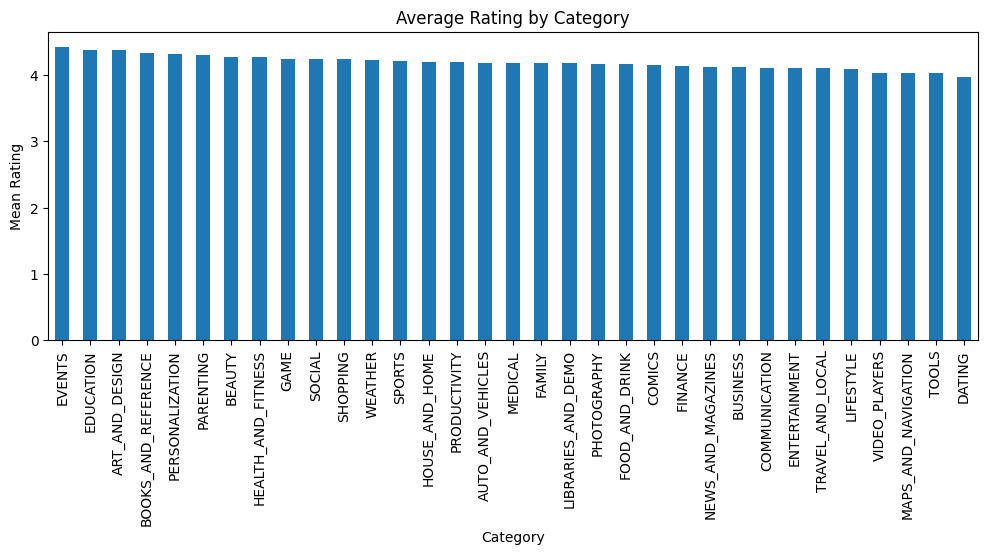

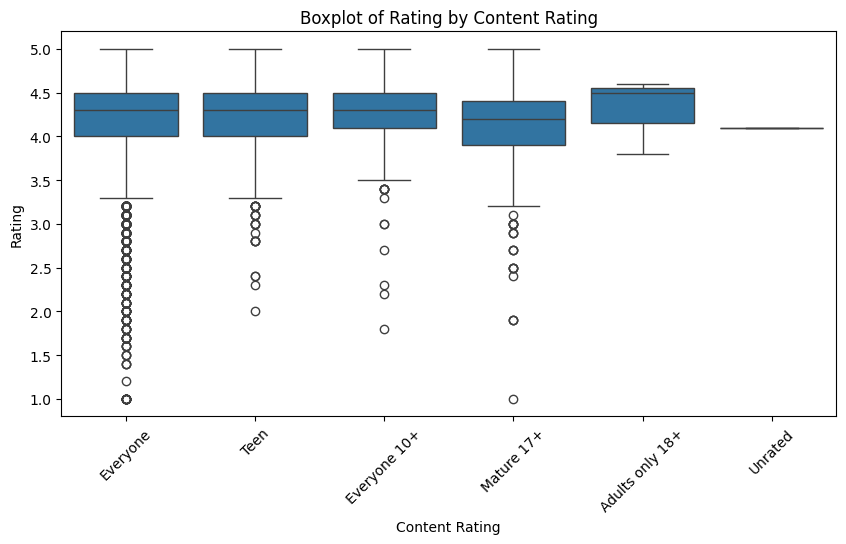

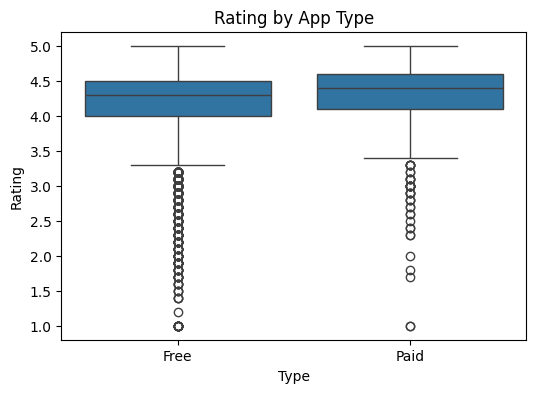

In [53]:

# Average rating by category

df_eda.groupby('Category')['Rating'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,4))
plt.title('Average Rating by Category')
plt.ylabel('Mean Rating')
plt.show()

# Boxplot: Rating vs. Content Rating
plt.figure(figsize=(10,5))
sns.boxplot(x='Content Rating', y='Rating', data=df_eda)
plt.xticks(rotation=45)
plt.title('Boxplot of Rating by Content Rating')
plt.show()

# Boxplot: Rating vs. Type
plt.figure(figsize=(6,4))
sns.boxplot(x='Type', y='Rating', data=df_eda)
plt.title('Rating by App Type')
plt.show()

## EDA Insights Summary
### App Type: 
Paid apps tend to have slightly higher median ratings than free apps, though both types can achieve high or low ratings. Free apps have more low-rating outliers.
### Content Rating: 
Most content ratings have similar rating distributions, with "Everyone" being the most common. There are some low-rating outliers across all groups.
### Category: 
The highest average ratings are found in EVENTS, EDUCATION, ART_AND_DESIGN, and BOOKS_AND_REFERENCE. Categories like TOOLS and DATING tend to have lower average ratings.


Model Performance Table
| Model              | Train R² | Test R² |
|--------------------|----------|---------|
| Linear Regression  | 0.166    | 0.129   |
| Random Forest      | 0.876    | 0.126   |
| Gradient Boosting  | 0.222    | 0.106   |
Interpretation (Markdown Cell Example)
### Model Results Interpretation

- **Best Performing Model:**  
All models have similar low test R² scores (~0.13), indicating limited predictive power for app ratings with the current features.
- **Overfitting:**  
The Random Forest model shows severe overfitting, with a very high train R² (0.88) but a low test R² (0.13). This means it memorizes the training data but does not generalize well.
- **Variance Explained:**  
The best model explains only about 13% of the variance in app ratings on unseen data. This suggests that most of the factors influencing app ratings are not captured by the available features.

### Linear Regression Coefficients

In [43]:
lr_coeffs = pd.Series(lr.coef_, index=X_train.columns)
print(lr_coeffs.sort_values(ascending=False).head(10))

Genres_Board;Pretend Play             0.837280
Genres_Racing;Pretend Play            0.808782
Genres_Puzzle;Education               0.723466
Genres_Strategy;Education             0.709700
Genres_Art & Design;Creativity        0.633925
Genres_Comics;Creativity              0.620362
Genres_Education;Creativity           0.611989
Genres_Art & Design                   0.575846
Genres_Music & Audio;Music & Video    0.574718
Genres_Strategy;Action & Adventure    0.527560
dtype: float64


### Feature Importance Insights

- **Most Important Features:**  
According to the Random Forest model, the most important predictors of app rating include [reviews, size, installs, and price].
- **Interpretation:**  
These features have the greatest influence on the predicted rating. However, since overall model performance is low, even these features do not strongly determine app ratings.

### Predict Ratings for All Apps

In [44]:
# Predict ratings for all apps using the best model (e.g., Random Forest)
df_model['Predicted_Rating'] = rf.predict(df_model.drop('Rating', axis=1))

# Add predictions to df_with_app by index alignment
df_with_app['Predicted_Rating'] = df_model['Predicted_Rating'].values

# Show top N apps with their names and predicted ratings
top_apps = df_with_app.sort_values('Predicted_Rating', ascending=False).head(10)
print(top_apps[['App', 'Predicted_Rating']])

top_apps.to_csv('top_predicted_apps.csv')

                                                    App  Predicted_Rating
2445                                     Labs on Demand             5.000
2472  NCLEX Multi-topic Nursing Exam Review-Quiz & n...             5.000
2477                             Basics of Orthopaedics             4.987
9301                                         EF Academy             4.986
7698                                          CP Trivia             4.983
8234                                         DB Pickles             4.982
8582                          Disciple Maker’s (DM) Lab             4.976
7896                                        CT Checkout             4.966
7136                                            CB News             4.965
2459    Anatomy & Physiology Vocabulary Exam Review App             4.965


Filter for New/Less Popular Apps

In [45]:

#apps with less than median installs but high predicted rating
median_installs = df_with_app['Installs'].median()
promising_newcomers = df_with_app[(df_with_app['Installs'] < median_installs)].sort_values('Predicted_Rating', ascending=False).head(10)
print(promising_newcomers[['App', 'Predicted_Rating', 'Installs']])

promising_newcomers.to_csv('top_predicted_apps.csv')

                                                    App  Predicted_Rating  \
2472  NCLEX Multi-topic Nursing Exam Review-Quiz & n...             5.000   
2445                                     Labs on Demand             5.000   
2477                             Basics of Orthopaedics             4.987   
9301                                         EF Academy             4.986   
7698                                          CP Trivia             4.983   
8234                                         DB Pickles             4.982   
8582                          Disciple Maker’s (DM) Lab             4.976   
7896                                        CT Checkout             4.966   
2452                                   Galaxies of Hope             4.965   
2459    Anatomy & Physiology Vocabulary Exam Review App             4.965   

      Installs  
2472        10  
2445        10  
2477        10  
9301        50  
7698       100  
8234       100  
8582       100  
7896        50  

## Executive Summary

In this project, we analyzed Google Play Store data to build a model that predicts app ratings based on various features such as category, number of reviews, installs, price, content rating, and more. The ultimate goal was to identify promising apps for promotion on the Play Store.



### Key Steps & Findings

- **Data Cleaning:**  
We removed missing values, standardized numerical columns (e.g., size, installs, price), and handled outliers in price, reviews, and installs.
- **Exploratory Data Analysis (EDA):**  
- Paid apps tend to have slightly higher median ratings than free apps, but both types can receive high or low ratings.
- Most content ratings (Everyone, Teen, etc.) have similar distributions, with "Everyone" being the most common.
- Categories such as EVENTS, EDUCATION, ART_AND_DESIGN, and BOOKS_AND_REFERENCE have the highest average ratings, while TOOLS and DATING are lower.
- **Modeling:**  
We trained Linear Regression, Random Forest, and Gradient Boosting models. All models achieved similar test R² scores (~0.13), indicating that the available features explain only a small portion of the variance in app ratings. Random Forest showed overfitting, performing well on training data but not generalizing to new data.
- **Feature Importance:**  
The most important predictors of app ratings were the number of reviews, installs, app size, and price.
- **Recommendations:**  
Using our best model, we identified the top 10 apps predicted to have the highest user ratings. We also highlighted promising newcomers—apps with low install counts but high predicted ratings—as strong candidates for promotion.

### Limitations

- The dataset lacks some potentially important features, such as review text sentiment, app update frequency, or user engagement metrics.
- The relationship between the provided features and app ratings appears weak, limiting predictive power.
- More advanced modeling or additional data sources could improve results.

### Business Recommendations

- Promote apps with high predicted ratings, especially those with low install counts, to surface quality new apps.
- Consider collecting richer data (e.g., user reviews, engagement) for future analysis.
- Regularly retrain and evaluate the model as new data becomes available.

## Top recommended apps

In [46]:
top_apps[['App', 'Predicted_Rating']].head(10)

,App,Predicted_Rating
2445,Labs on Demand,5.000
2472,NCLEX Multi-topic Nursing Exam Review-Quiz & n...,5.000
2477,Basics of Orthopaedics,4.987
9301,EF Academy,4.986
7698,CP Trivia,4.983
8234,DB Pickles,4.982
8582,Disciple Maker’s (DM) Lab,4.976
7896,CT Checkout,4.966
7136,CB News,4.965
2459,Anatomy & Physiology Vocabulary Exam Review App,4.965
